Input Words: ['I', 'love', 'AI']

Encoder Outputs:
tensor([[0.1000, 0.3000],
        [0.8000, 0.2000],
        [0.9000, 0.7000]])

Decoder Hidden State: tensor([0.7000, 0.6000])

Attention Scores: tensor([0.2500, 0.6800, 1.0500])
Attention Weights: tensor([0.2100, 0.3228, 0.4673])

Context Vector: tensor([0.6998, 0.4546])


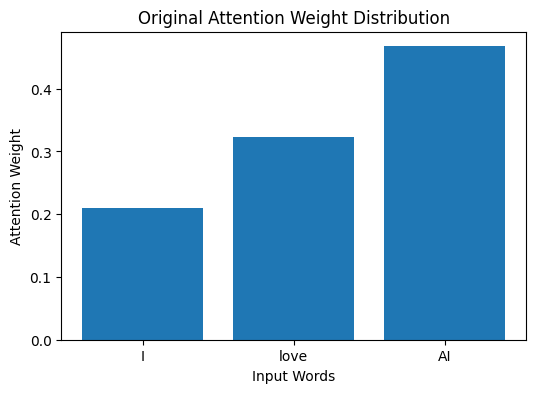


New Decoder Hidden State: tensor([0.2000, 0.9000])
New Attention Weights: tensor([0.2679, 0.2816, 0.4505])


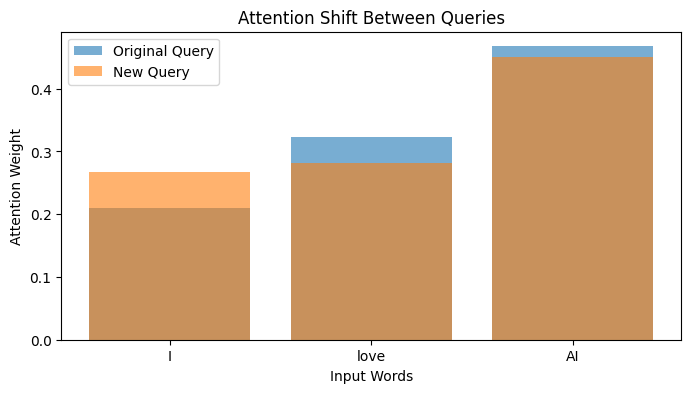

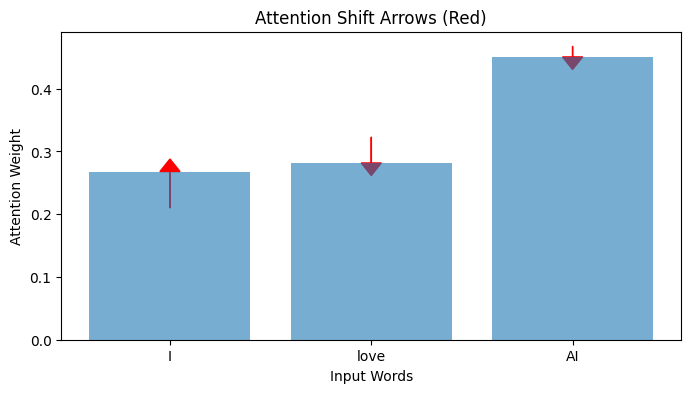

In [ ]:
# ============================================================
# LAB EXPERIMENT: UNDERSTANDING ATTENTION MECHANISM
# ============================================================

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# STEP 1: INPUT SENTENCE (WORDS)
# ------------------------------------------------------------
words = ["I", "love", "AI"]
print("Input Words:", words)

# ------------------------------------------------------------
# STEP 2: ENCODER OUTPUTS (KEYS & VALUES)
# ------------------------------------------------------------
encoder_outputs = torch.tensor([
    [0.1, 0.3],   # "I"
    [0.8, 0.2],   # "love"
    [0.9, 0.7]    # "AI"
], dtype=torch.float)

print("\nEncoder Outputs:")
print(encoder_outputs)

# ------------------------------------------------------------
# STEP 3: DECODER HIDDEN STATE (QUERY)
# ------------------------------------------------------------
decoder_hidden = torch.tensor([0.7, 0.6], dtype=torch.float)
print("\nDecoder Hidden State:", decoder_hidden)

# ------------------------------------------------------------
# STEP 4: ATTENTION SCORES & WEIGHTS
# ------------------------------------------------------------
attention_scores = torch.matmul(encoder_outputs, decoder_hidden)
attention_weights = F.softmax(attention_scores, dim=0)

print("\nAttention Scores:", attention_scores)
print("Attention Weights:", attention_weights)

# ------------------------------------------------------------
# STEP 5: CONTEXT VECTOR
# ------------------------------------------------------------
context_vector = torch.sum(
    attention_weights.unsqueeze(1) * encoder_outputs,
    dim=0
)

print("\nContext Vector:", context_vector)

# ------------------------------------------------------------
# STEP 6: VISUALIZE ORIGINAL ATTENTION
# ------------------------------------------------------------
weights_np = attention_weights.detach().numpy()

plt.figure(figsize=(6, 4))
plt.bar(words, weights_np)
plt.title("Original Attention Weight Distribution")
plt.xlabel("Input Words")
plt.ylabel("Attention Weight")
plt.show()

# ------------------------------------------------------------
# STEP 7: CHANGE DECODER HIDDEN STATE
# ------------------------------------------------------------
decoder_hidden_new = torch.tensor([0.2, 0.9], dtype=torch.float)
new_scores = torch.matmul(encoder_outputs, decoder_hidden_new)
new_weights = F.softmax(new_scores, dim=0)

print("\nNew Decoder Hidden State:", decoder_hidden_new)
print("New Attention Weights:", new_weights)

# ------------------------------------------------------------
# STEP 8: COMPARE ATTENTION SHIFT
# ------------------------------------------------------------
new_weights_np = new_weights.detach().numpy()

plt.figure(figsize=(8, 4))
plt.bar(words, weights_np, alpha=0.6, label="Original Query")
plt.bar(words, new_weights_np, alpha=0.6, label="New Query")
plt.title("Attention Shift Between Queries")
plt.xlabel("Input Words")
plt.ylabel("Attention Weight")
plt.legend()
plt.show()

# ------------------------------------------------------------
# OPTIONAL: ARROW VISUALIZATION OF SHIFT
# ------------------------------------------------------------
plt.figure(figsize=(8, 4))
for i, (old, new) in enumerate(zip(weights_np, new_weights_np)):
    plt.arrow(i, old, 0, new - old,
              head_width=0.1, head_length=0.02, color="red")

plt.bar(words, new_weights_np, alpha=0.6)
plt.title("Attention Shift Arrows (Red)")
plt.xlabel("Input Words")
plt.ylabel("Attention Weight")
plt.show()


Source Words: ['I', 'love', 'AI']
Target Words: ['Je', 'aime', "l'IA"]

Encoder Output:
 tensor([[ 0.0042, -0.7910],
        [ 0.0068, -0.7911],
        [ 0.0105, -0.7913]], grad_fn=<AddmmBackward0>)

Encoder Attention Weights:
 tensor([[0.3873, 0.3037, 0.3091],
        [0.4067, 0.2943, 0.2991],
        [0.4341, 0.2802, 0.2857]], grad_fn=<SoftmaxBackward0>)

Decoder Output:
 tensor([[-0.6227, -0.2530],
        [-0.6227, -0.2530],
        [-0.6227, -0.2530]], grad_fn=<AddmmBackward0>)

Decoder Self-Attention:
 tensor([[0.3455, 0.3321, 0.3224],
        [0.3418, 0.3336, 0.3246],
        [0.3431, 0.3340, 0.3229]], grad_fn=<SoftmaxBackward0>)

Decoder Encoder–Decoder Attention:
 tensor([[0.3335, 0.3334, 0.3331],
        [0.3335, 0.3334, 0.3331],
        [0.3335, 0.3334, 0.3331]], grad_fn=<SoftmaxBackward0>)


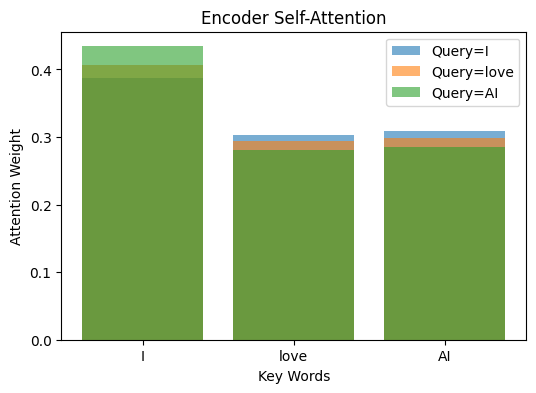

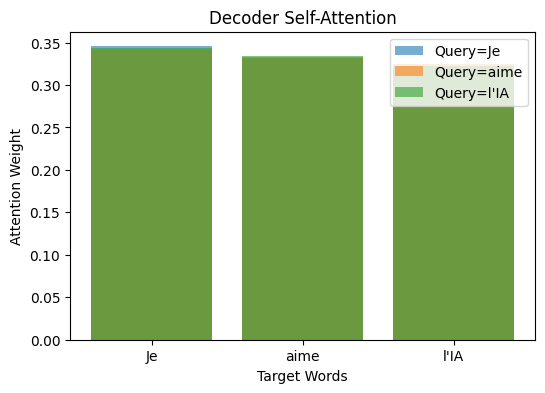

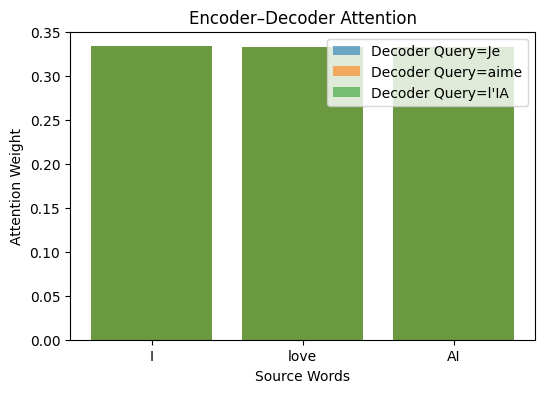

In [ ]:
# ============================================================
# LAB EXPERIMENT: SIMPLE TRANSFORMER ENCODER–DECODER
# ============================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# STEP 1: INPUT AND TARGET SENTENCE
# ------------------------------------------------------------
source_words = ["I", "love", "AI"]
target_words = ["Je", "aime", "l'IA"]

print("Source Words:", source_words)
print("Target Words:", target_words)

# ------------------------------------------------------------
# STEP 2: EMBEDDINGS (MANUAL)
# ------------------------------------------------------------
source_embeddings = torch.tensor([
    [0.1, 0.3],
    [0.8, 0.2],
    [0.9, 0.7]
], dtype=torch.float)

target_embeddings = torch.tensor([
    [0.2, 0.1],
    [0.7, 0.3],
    [0.8, 0.6]
], dtype=torch.float)

# ------------------------------------------------------------
# STEP 3: SIMPLE TRANSFORMER ENCODER
# ------------------------------------------------------------
class SimpleTransformerEncoder(nn.Module):
    def __init__(self, embed_dim):
        super().__init__()
        self.W_Q = nn.Linear(embed_dim, embed_dim)
        self.W_K = nn.Linear(embed_dim, embed_dim)
        self.W_V = nn.Linear(embed_dim, embed_dim)
        self.fc = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        Q = self.W_Q(x)
        K = self.W_K(x)
        V = self.W_V(x)

        d_k = K.shape[1]
        scores = Q @ K.T / torch.sqrt(torch.tensor(d_k, dtype=torch.float))
        attention_weights = F.softmax(scores, dim=1)

        context = attention_weights @ V
        output = self.fc(context)
        return output, attention_weights

# ------------------------------------------------------------
# STEP 4: SIMPLE TRANSFORMER DECODER
# ------------------------------------------------------------
class SimpleTransformerDecoder(nn.Module):
    def __init__(self, embed_dim):
        super().__init__()

        # Decoder self-attention
        self.W_Q_dec = nn.Linear(embed_dim, embed_dim)
        self.W_K_dec = nn.Linear(embed_dim, embed_dim)
        self.W_V_dec = nn.Linear(embed_dim, embed_dim)

        # Encoder–Decoder attention
        self.W_Q_enc_dec = nn.Linear(embed_dim, embed_dim)
        self.W_K_enc_dec = nn.Linear(embed_dim, embed_dim)
        self.W_V_enc_dec = nn.Linear(embed_dim, embed_dim)

        self.fc = nn.Linear(embed_dim, embed_dim)

    def forward(self, target, encoder_output):
        # Decoder self-attention
        Q = self.W_Q_dec(target)
        K = self.W_K_dec(target)
        V = self.W_V_dec(target)

        d_k = K.shape[1]
        scores_self = Q @ K.T / torch.sqrt(torch.tensor(d_k, dtype=torch.float))
        attn_self = F.softmax(scores_self, dim=1)
        context_self = attn_self @ V

        # Encoder–Decoder attention
        Q_ed = self.W_Q_enc_dec(context_self)
        K_ed = self.W_K_enc_dec(encoder_output)
        V_ed = self.W_V_enc_dec(encoder_output)

        scores_ed = Q_ed @ K_ed.T / torch.sqrt(torch.tensor(d_k, dtype=torch.float))
        attn_ed = F.softmax(scores_ed, dim=1)
        context_ed = attn_ed @ V_ed

        output = self.fc(context_ed)
        return output, attn_self, attn_ed

# ------------------------------------------------------------
# STEP 5: CREATE MODELS
# ------------------------------------------------------------
embed_dim = 2
encoder = SimpleTransformerEncoder(embed_dim)
decoder = SimpleTransformerDecoder(embed_dim)

# ------------------------------------------------------------
# STEP 6: ENCODER FORWARD PASS
# ------------------------------------------------------------
encoder_output, encoder_attention = encoder(source_embeddings)

print("\nEncoder Output:\n", encoder_output)
print("\nEncoder Attention Weights:\n", encoder_attention)

# ------------------------------------------------------------
# STEP 7: DECODER FORWARD PASS
# ------------------------------------------------------------
decoder_output, dec_self_attn, dec_enc_attn = decoder(
    target_embeddings, encoder_output
)

print("\nDecoder Output:\n", decoder_output)
print("\nDecoder Self-Attention:\n", dec_self_attn)
print("\nDecoder Encoder–Decoder Attention:\n", dec_enc_attn)

# ------------------------------------------------------------
# STEP 8: VISUALIZATION
# ------------------------------------------------------------

# Encoder self-attention
plt.figure(figsize=(6, 4))
for i, word in enumerate(source_words):
    plt.bar(source_words,
            encoder_attention[i].detach().numpy(),
            alpha=0.6,
            label=f"Query={word}")
plt.title("Encoder Self-Attention")
plt.xlabel("Key Words")
plt.ylabel("Attention Weight")
plt.legend()
plt.show()

# Decoder self-attention
plt.figure(figsize=(6, 4))
for i, word in enumerate(target_words):
    plt.bar(target_words,
            dec_self_attn[i].detach().numpy(),
            alpha=0.6,
            label=f"Query={word}")
plt.title("Decoder Self-Attention")
plt.xlabel("Target Words")
plt.ylabel("Attention Weight")
plt.legend()
plt.show()

# Encoder–Decoder attention
plt.figure(figsize=(6, 4))
for i, word in enumerate(target_words):
    plt.bar(source_words,
            dec_enc_attn[i].detach().numpy(),
            alpha=0.6,
            label=f"Decoder Query={word}")
plt.title("Encoder–Decoder Attention")
plt.xlabel("Source Words")
plt.ylabel("Attention Weight")
plt.legend()
plt.show()
